In [ ]:
import pandas as pd
df = pd.read_csv("/content/BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Data Cleaning

In [ ]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
df = df.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
             "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
              "CLIENTNUM"], axis=1)

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [ ]:
df.duplicated().sum()

0

## Data Encoding

In [ ]:
df.Gender.value_counts()

Gender
F    5358
M    4769
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(df[["Gender"]])

OneHotEncoder()

In [ ]:
res = encoder.transform(df[["Gender"]]).toarray()
df[["Female","Male"]] = res

In [ ]:
df.drop("Gender",axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

for col in df.select_dtypes("O").columns:
  df[col] = encoder.fit_transform(df[col])

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Female,Male
0,1,45,3,3,1,2,0,39,5,1,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.0,1.0
1,1,49,5,2,2,4,0,44,6,1,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1.0,0.0
2,1,51,3,2,1,3,0,36,4,1,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.0,1.0
3,1,40,4,3,3,4,0,34,3,4,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1.0,0.0
4,1,40,3,5,1,2,0,21,5,1,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.0,1.0


In [ ]:
X= df.drop("Attrition_Flag", axis=1)
y= df.Attrition_Flag

## Data Balancing

<Axes: xlabel='Attrition_Flag'>

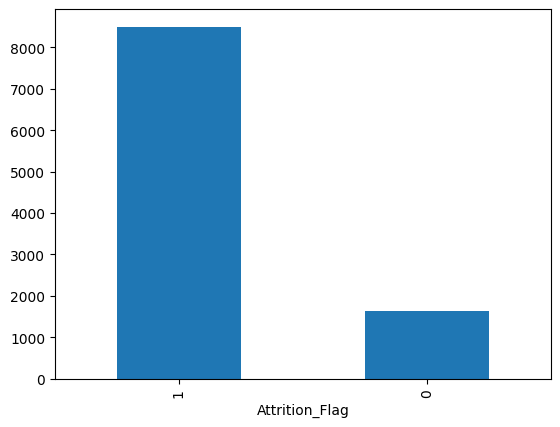

In [ ]:
df.Attrition_Flag.value_counts().plot(kind="bar")

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X, y = sampler.fit_resample(X,y)

In [ ]:
y.value_counts()

Attrition_Flag
1    8500
0    8500
Name: count, dtype: int64

## Data Scaling

In [ ]:
col = ["Customer_Age","Months_on_book","Credit_Limit","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Trans_Amt","Total_Trans_Ct"]

In [ ]:
X[col]

,Customer_Age,Months_on_book,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct
0,45,39,12691.000000,777,11914.000000,1144,42
1,49,44,8256.000000,864,7392.000000,1291,33
2,51,36,3418.000000,0,3418.000000,1887,20
3,40,34,3313.000000,2517,796.000000,1171,20
4,40,21,4716.000000,0,4716.000000,816,28
...,...,...,...,...,...,...,...
16995,53,35,15610.452240,0,15610.452240,827,21
16996,40,35,14038.824295,1840,12198.447639,2037,46
16997,45,32,8886.544833,0,8886.544833,1866,40
16998,55,50,34516.000000,1013,33502.254528,1805,38


In [ ]:
from sklearn.preprocessing import MinMaxScaler
model= MinMaxScaler(feature_range=(1,5))
model.fit(X[col])
X[col]= model.transform(X[col])
df[col]= X[col]

In [ ]:
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Female,Male
0,1,2.617021,3,3,1,2,0,3.418605,5,1,...,2.360760,2.234803,2.380465,1.335,1.141093,1.992248,1.625,0.061,0.0,1.0
1,1,2.957447,5,2,2,4,0,3.883721,6,1,...,1.824447,2.373063,1.856373,1.541,1.173807,1.713178,3.714,0.105,1.0,0.0
2,1,3.127660,3,2,1,3,0,3.139535,4,1,...,1.239400,1.000000,1.395793,2.594,1.306443,1.310078,2.333,0.000,0.0,1.0
3,1,2.191489,4,3,3,4,0,2.953488,3,4,...,1.226703,5.000000,1.091907,1.405,1.147101,1.310078,2.333,0.760,1.0,0.0
4,1,2.191489,3,5,1,2,0,1.744186,5,1,...,1.396364,1.000000,1.546229,2.175,1.068098,1.558140,2.500,0.000,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.shape

(13600, 20)

## Modeling

In [ ]:
import tensorflow as tf

In [ ]:
model= tf.keras.models.Sequential(name="ANN_Model")
model.add(tf.keras.layers.Dense(4, activation="relu", input_dim=20, name="ANN_1"))
model.add(tf.keras.layers.Dense(3, activation="relu",name="ANN_2"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid", name="ANN_3"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "ANN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ANN_1 (Dense)               (None, 4)                 84        
                                                                 
 ANN_2 (Dense)               (None, 3)                 15        
                                                                 
 ANN_3 (Dense)               (None, 1)                 4         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history= model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
383/383 [==============================] - 2s 2ms/step - loss: 0.6891 - accuracy: 0.5442 - val_loss: 0.6710 - val_accuracy: 0.6154
Epoch 2/10
383/383 [==============================] - 1s 2ms/step - loss: 0.6353 - accuracy: 0.6774 - val_loss: 0.5953 - val_accuracy: 0.7235
Epoch 3/10
383/383 [==============================] - 1s 2ms/step - loss: 0.5765 - accuracy: 0.7310 - val_loss: 0.5476 - val_accuracy: 0.7456
Epoch 4/10
383/383 [==============================] - 1s 2ms/step - loss: 0.5465 - accuracy: 0.7491 - val_loss: 0.5220 - val_accuracy: 0.7588
Epoch 5/10
383/383 [==============================] - 1s 2ms/step - loss: 0.5295 - accuracy: 0.7547 - val_loss: 0.5048 - val_accuracy: 0.7684
Epoch 6/10
383/383 [==============================] - 1s 2ms/step - loss: 0.5167 - accuracy: 0.7602 - val_loss: 0.4924 - val_accuracy: 0.7794
Epoch 7/10
383/383 [==============================] - 1s 2ms/step - loss: 0.5059 - accuracy: 0.7660 - val_loss: 0.4793 - val_accuracy: 0.7875
Epoch 

In [ ]:
import matplotlib.pyplot as plt


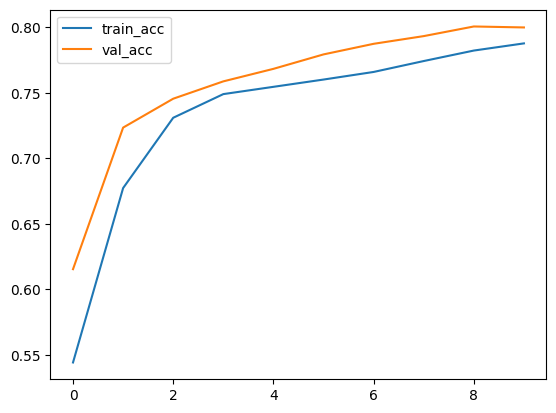

In [ ]:
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.legend()

In [ ]:
pred= model.predict(X_test)

107/107 [==============================] - 0s 2ms/step


In [ ]:
pred = pred[:,0]

In [ ]:
class_pred = []
for val in pred:
  if val > 0.5:
    class_pred.append(1)
  else:
    class_pred.append(0)

In [ ]:
y_pred = class_pred

In [ ]:
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Accuracy :  0.7955882352941176
--------------------------------------------------
F1 :  [0.79247537 0.7986091 ]
--------------------------------------------------
Reacll :  [0.78660344 0.80443666]
--------------------------------------------------
Precision :  [0.79843562 0.79286536]
--------------------------------------------------
Confusion Matrix....
 [[1327  360]
 [ 335 1378]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1687
           1       0.79      0.80      0.80      1713

    accuracy                           0.80      3400
   macro avg       0.80      0.80      0.80      3400
weighted avg       0.80      0.80      0.80      3400

--------------------------------------------------
Plotting Confusion Matrix...



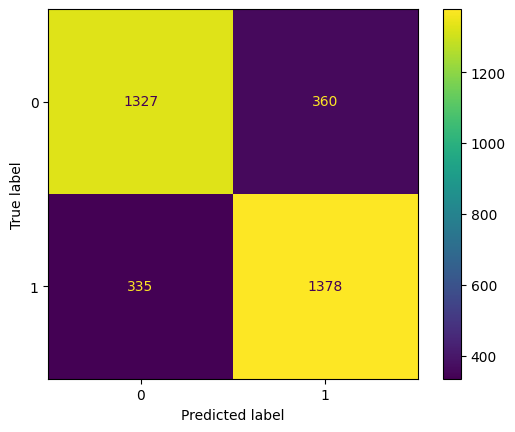

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average=None)

# Recall
recall = recall_score(y_test, y_pred, average=None)

# F1 Score
f1_sco = f1_score(y_test, y_pred, average=None)

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Report
report = classification_report(y_test, y_pred)

print('Accuracy : ', accuracy)
print("-"*50)
print('F1 : ', f1_sco)
print("-"*50)
print('Reacll : ', recall)
print("-"*50)
print('Precision : ', precision)
print("-"*50)
print('Confusion Matrix....\n', confusion_mat)
print("-"*50)
print('Classification Report....\n', report)
print("-"*50)
print('Plotting Confusion Matrix...\n')
disp = ConfusionMatrixDisplay(confusion_mat, display_labels=None)
disp.plot()
plt.show()


In [ ]:
pd.DataFrame({"Actual": y_test, "Predictions": y_pred})

,Actual,Predictions
15366,0,1
2948,1,0
11028,0,0
1253,1,1
10444,0,0
...,...,...
5289,1,0
8820,0,0
16982,0,0
8512,1,1
